In [1]:
#remember to restart kernel after changing the class_customtranslator or candidate_TFBSs_crispr_protospacers file
# use gene_feature_plot conda environment
import pandas as pd
import numpy as np
#import pygenometracks.tracks as pygtk

import subprocess
import os
# from IPython.display import HTML
# import panel as pn
# import panel.widgets as pnw
# pn.extension()
from matplotlib import rcParams

# import panel as pn
import matplotlib.pyplot as plt
# import biotite.sequence.graphics as graphics
# import biotite.application.muscle as muscle
# import biotite.sequence.io.fasta as fasta
# import biotite.sequence as seq

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../TRAMP')


import class_customtranslator_qpcrs
#import functions
from candidate_TFBSs_crispr_protospacers import move_position, make_plot, gb_file_to_seqrecord, preprocess_record, slice_sequence_with_features, slice_feature, end_violation_pos, start_violation_pos

In [2]:
#plant lines: 69-9 NLP7, 125-4 ARF9 NLP7, 130-4 ARF18, 134-3 DREB26, 139-9 ARF9
# manually made fasta file containing 40bp sequence containing the mutation with the genomic start and stop positions
# take the centre of each mutation genomic position and annotate it on to the promoter sequence
# mutation locations relative to TSS
# NLP7 TSS: 12479528
# ARF9 TSS: 12451143
# ARF18 TSS: 22887889
# DREB26 TSS: 7696427

In [3]:
def set_rc_params():
    #set plot parameters
    rcParams['xtick.major.width'] = 1
    rcParams['ytick.major.width'] = 1
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    rcParams['lines.linewidth'] = 1
    #allow font to be edited later in pdf editor
    rcParams ['pdf.fonttype'] = 42
    # font_size = 11
    # rcParams["font.size"] = font_size


    #make svg text editable
    rcParams['svg.fonttype'] = 'none'

In [4]:
def make_plots(input_location, fontsize=11):
    #make single plot
    fig = plt.figure(figsize=(8, 10))


    #promoter_names=dict([('promoter_name1',"nlp7-at4g24020_ensembl_plant"),])#('promoter_name1','arf9-at4g23980_ensembl_plant')
    promoter_names=dict([('promoter_name7',"nlp7-at4g24020_ensembl_plant"),
        ('promoter_name6',"nlp6-at1g64530_ensembl_plant"),
        #('promoter_name9',"tga1-at5g65210_ensembl_plant"),
        ('promoter_name3',"arf18-at3g61830_ensembl_plant"),
        #('promoter_name3',"arf9-at4g23980_ensembl_plant"),
        ('promoter_name2',"anac032-at1g77450_ensembl_plant"),
        #('promoter_name3',"anr1-at2g14210_ensembl_plant"),
        ('promoter_name4',"dreb26-at1g21910_ensembl_plant"),
        ('promoter_name5',"nir1-at2g15620_ensembl_plant"),
        ('promoter_name1','arf9-at4g23980_ensembl_plant')])
    #sort promoter names dictionary in alphabetical order
    promoter_names = {k: v for k,v in sorted(promoter_names.items(), key=lambda item: item[0])}
 
    #create empty dictionary
    seqrecords = {}
    #Define the number of bp downstream of the TSS to include.
    #Any sequence further downstream will be trimmed. Any sequence upstream of the promoter annotation will be trimmed
    bp_downstream_of_TSS = 1000
    for k,v in promoter_names.items():             
        #add to new dictionary of seqrecords
        seqrecords[k] = gb_file_to_seqrecord(v,input_location,bp_downstream_of_TSS)

    start=0
    stop=1
    prom_name='NA'
    make_plot(seqrecords, promoter_names, input_location, input_location, bp_downstream_of_TSS, fig, start, stop,prom_name, openchromatin=True, dnaseI=False, crop_record=False,)

    # fig.savefig(f'{input_location}/protospacers.svg', format='svg', dpi=1200,bbox_inches="tight",transparent=True, pad_inches=0.2)

    # graphics.plot_alignment_type_based(
    #     ax, alignment[:200, order.tolist()], labels=[hits[i] for i in order],
    #     show_numbers=True, color_scheme="clustalx"
    # )

In [5]:
# def make_plots(mutation_name,gene_name,input_location,start,stop, TSS_location):
#     """function to make folder for plots"""
#      #first make output_location folder

#     output_location = f"{input_location}/plots/{mutation_name}"
#     try:
#         # Create target Directory
#         os.mkdir(output_location)
#         print("Directory ", output_location, " created")
#     except FileExistsError:
#         print("Directory ", output_location, " already exists")
#     # file_location=f'{input_location}/{mutation_name}.fa'
#     # #get new start and stop locations relative to TSS_location
#     # new_start = start - TSS_location 
#     # new_stop = stop - TSS_location
#     #make plots
#     make_plots2(file_location,input_location,output_location,gene_name, new_start, new_stop)

    

arf9-at4g23980_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
anac032-at1g77450_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
arf18-at3g61830_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
dreb26-at1g21910_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
nir1-at2g15620_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
nlp6-at1g64530_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists
nlp7-at4g24020_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists


/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:213: BiopythonParserWarning: Over indented root_open_chromatin feature?
  warnings.warn(
/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:213: BiopythonParserWarning: Over indented shoot_open_chromatin feature?
  warnings.warn(


RGBA
converting_image


<Figure size 800x1000 with 0 Axes>

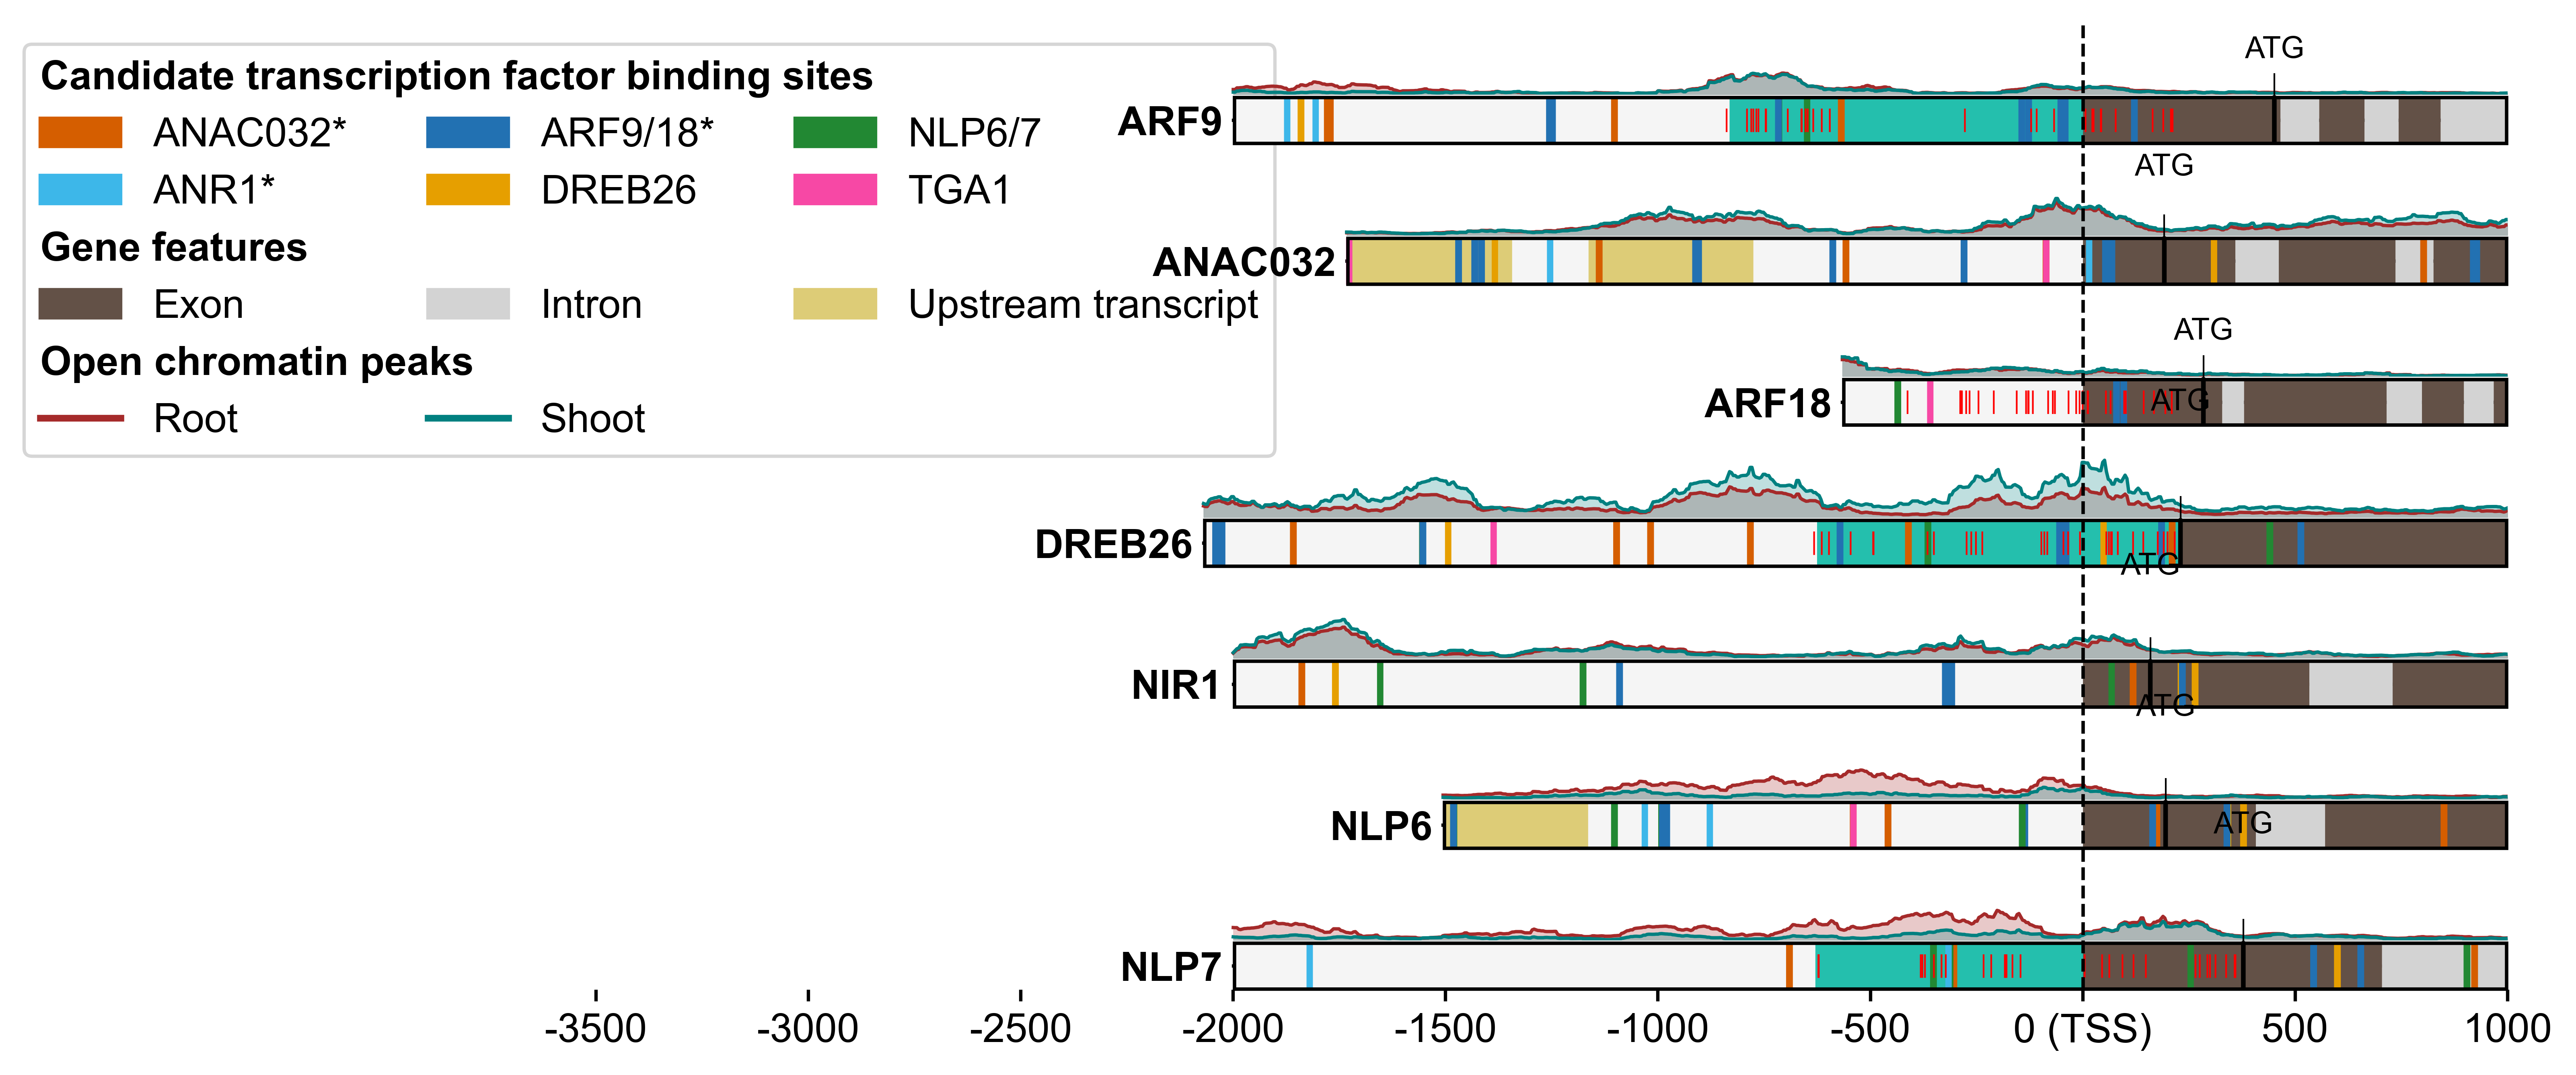

In [6]:
#read in the fasta file
input_location = '../../data/CRISPR_library/protospacers'


# update rcparams
set_rc_params()

# #first make new folder
# dirName = f"{input_location}/plots"
# try:
#     # Create target Directory
#     os.mkdir(dirName)
#     print("Directory ", dirName, " created")
# except FileExistsError:
#     print("Directory ", dirName, " already exists")

#TSS locations for each gene
# NLP7 TSS: 12479528
# ARF9 TSS: 12451143
# ARF18 TSS: 22887889
# DREB26 TSS: 7696427
# need to check all coordinates on benchling, make all GB file numbering - done
# Then open in inkscape, draw box round TFBSs, consider adding additional TFBS boxes. Consider shifting overlapping TFBSs.
# Actually will need to reduce size of TFBSs - they are longer than original - so check on Benchling
#make plots 69-9 NLP7 mutation 1 12479771_12479810
make_plots(input_location)
 
